<a href="https://colab.research.google.com/github/HarshiniAiyyer/Relearning/blob/main/pytorch/Pytorch_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Pytorch Workflow

A typical workflow looks like this

1. Get data ready
2. Build or pick up a pretrained model \
  2.1 Pick a loss function and optimizer \
  2.2 Build a training loop

3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve thru experimentation
6. Save and reload the trained model

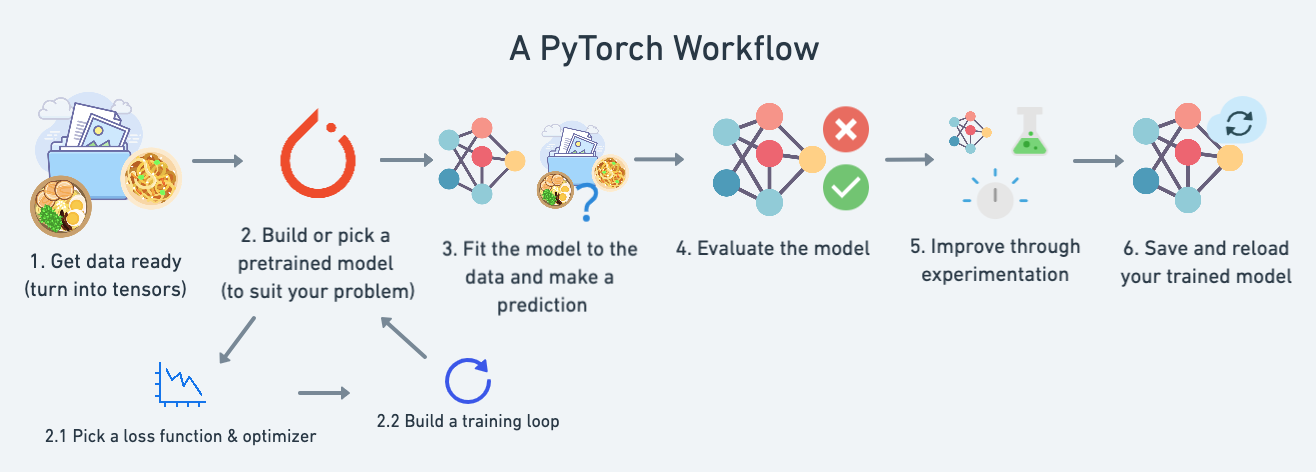

In [1]:
import torch
from torch import nn #nn contains all pytorch's building blocks
#nn contains all the layers of the neural network

import matplotlib.pyplot as plt

#pytorch version
torch.__version__

'2.8.0+cu126'

### Data Preparing and Loading

- Lin Reg: Y = bX + a \

OR

y = w.x + b
Slope b is the gradient.

In [2]:
#create known parameters

w = 0.7
b = 0.3

#create
start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim = 1) #adds extra dimensions
y = w * x + b

x[:5], y[:5], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

### Splitting data into train and testing

In [3]:
#create train test split

trainsplit = int(0.8 * len(x))

#till the last element of x
x_train, y_train = x[:trainsplit], y[:trainsplit]

#from the last element of the given array x
x_test, y_test = x[trainsplit:], y[trainsplit:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data


In [4]:
def plots(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions = None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "training data")

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "predictions")

  plt.legend(prop = {"size": 14})

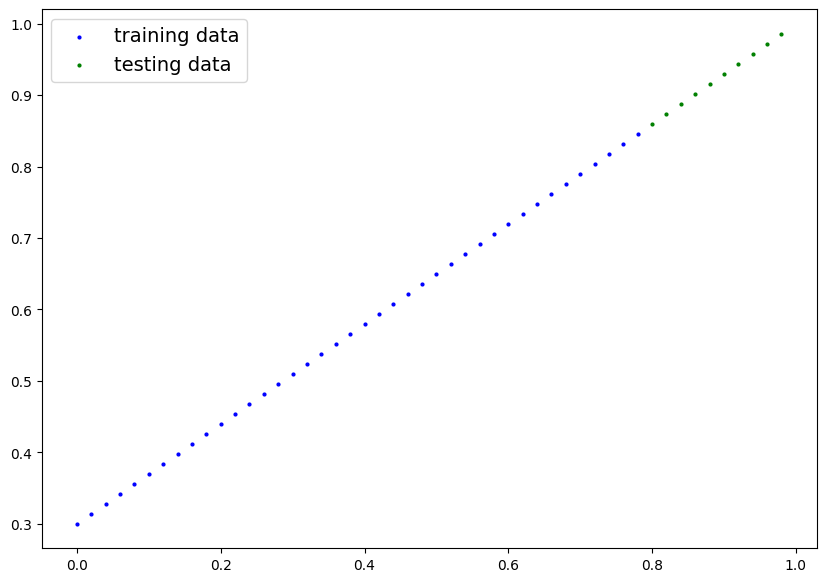

In [5]:
plots()

### Creating the first Pytorch model

- performs gradient descent and backpropagation

In [6]:
# Model class
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

#### Model building essentials

- torch.nn : contains all NN
- torch.nn.Parameter -: what parameters shud our model try and learn, often a pytorch layer
- torch.nn.Module: Base class for all NN modules
- torch.optim: where all pytorch optimizers are present, they will help with gradient descent
- def forward(): main logic of the NN / forward pass of the NN


#### Whats inside the NN?

In [7]:
# Seed + Model instance
torch.manual_seed(42)
model_0 = LR()

# Show parameters
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


#### List the parameters but named

In [8]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Model Predictions

In [9]:
with torch.inference_mode():    #turns off gradient tracking
  y_pred = model_0(x_test)

#or
#with torch.no_grad():
  #y_pred = model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

#### Plotting predictions

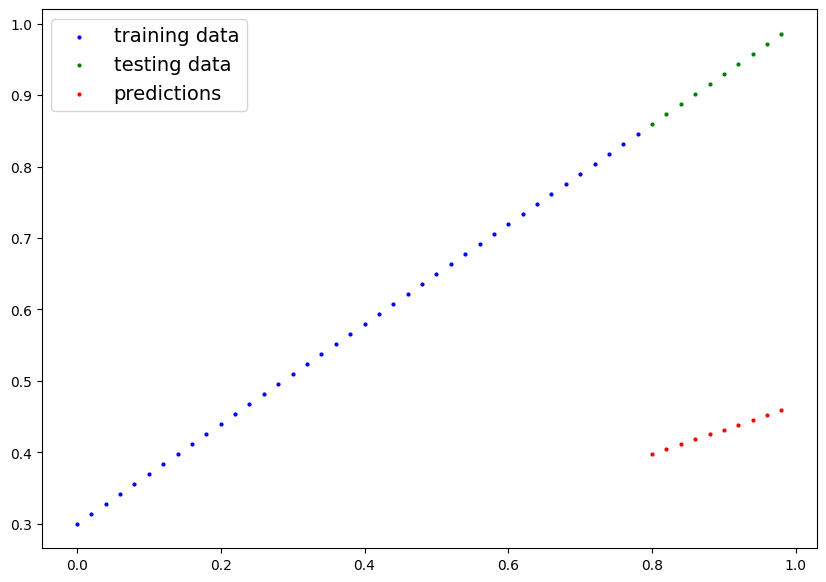

In [10]:
plots(predictions= y_pred)

### Train Model

- **Loss function**: How wrong is the model in its predictions. Also known as cost function. Here the difference between red dots and blue dots. or MAE. Also known as MAE Loss.

- **Optimizer**: takes into account the loss of a model and adjusts the model's parameters (weight, bias in our case) to improve the loss.

- **Learning Rate** - Present inside the optimizer, it defines how big or small the optimzer changes parameters.

- **Parameter VS Hyperparameters**: Params are set by the model, wheras Hyperparams are set by the DS or the MLE.

We also need two loops in Pytorch.

- **Training Loop**
- **Testing Loop**




#### Set up loss function and Optimizer

In [11]:
#setup a loss function
lossfn = nn.L1Loss()

#set up an optimizer (stochastic gradient descent)
opt = torch.optim.SGD(params = model_0.parameters(),
                      lr = 0.01)

#### Building a Training Loop and Testing Loop

What we need:

*1 epoch / loop contains*


- Forward pass / forward function
- Calculate loss (compare forward pass predictions to ground truth labels)
- Loss backward (move backwards thru the network to calc the grdients of each of the parameters of the model wrt loss) i.e **backpropagation**.
- Optimizer step (use the optimizer to adjust our models parameters to try and improve the loss). ie **gradient descent**.


In [12]:
epoch_count = []
train_loss_values = []
test_loss_values = []

In [13]:
epoch = 100

### TRAINING
# LOOP THRU THE MODEL
for e in range(epoch):
  #train() sets all parameters that requires gradients to require gradients
  model_0.train()

  #### FORWARD FUNCTION
  y_pred = model_0(x_train)

  #### LOSS FUNCTION
  loss = lossfn(y_pred, y_train)

  #### OPTIMIZER
  opt.zero_grad()

  #### PERFORM BACKPROPAGATION ON THE LOSS WRT PARAMETERS OF THE MODE
  loss.backward()

  #### STEP THE OPTIMIZER(PERFORM GRADIENT DESCENT)
  opt.step()

  # NOTE: The optimizer changes will accummulate thru the loop so..we have to zero them above after the backward function

  #testing
  model_0.eval() #turns off features that arent required for testing

  print(model_0.state_dict())

OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
OrderedDict({'weight': tensor([0.3445]), 'bias': tensor([0.1488])})
OrderedDict({'weight': tensor([0.3484]), 'bias': tensor([0.1588])})
OrderedDict({'weight': tensor([0.3523]), 'bias': tensor([0.1688])})
OrderedDict({'weight': tensor([0.3562]), 'bias': tensor([0.1788])})
OrderedDict({'weight': tensor([0.3601]), 'bias': tensor([0.1888])})
OrderedDict({'weight': tensor([0.3640]), 'bias': tensor([0.1988])})
OrderedDict({'weight': tensor([0.3679]), 'bias': tensor([0.2088])})
OrderedDict({'weight': tensor([0.3718]), 'bias': tensor([0.2188])})
OrderedDict({'weight': tensor([0.3757]), 'bias': tensor([0.2288])})
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])})
OrderedDict({'weight': tensor([0.3835]), 'bias': tensor([0.2488])})
OrderedDict({'weight': tensor([0.3874]), 'bias': tensor([0.2588])})
OrderedDict({'weight': tensor([0.3913]), 'bias': tensor([0.2688])})
OrderedDict({'weight': tensor([0.3952]), 'bias':

In [14]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

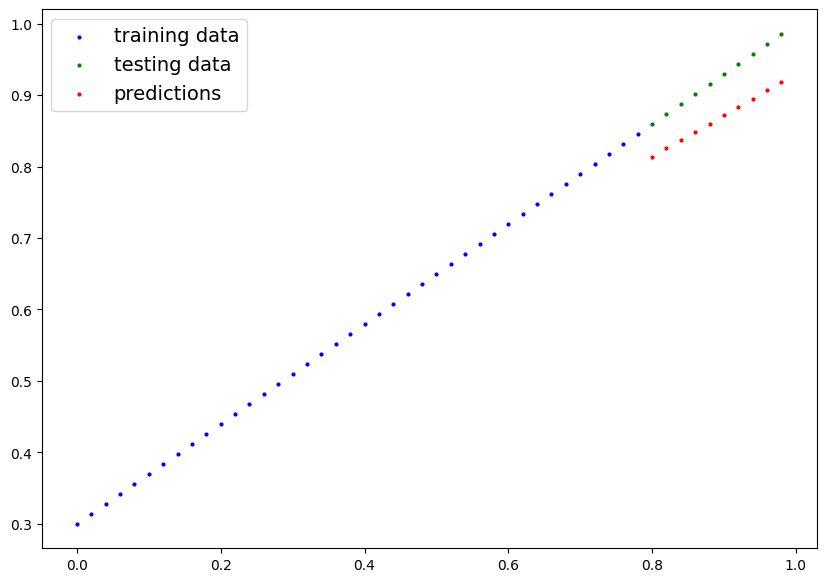

In [15]:
plots(predictions=y_preds_new)

### Testing Loop


In [16]:
model_0.eval()

with torch.inference_mode():

   #turns off gradient tracking - 1. Do the forward pass
   test_pred = model_0(x_test)

   #2. Calculate the loss
   test_loss = lossfn(test_pred, y_test)

#printout whats happening (simply)
if epoch % 10 == 0:
  epoch_count.append(epoch)
  train_loss_values.append(loss)
  test_loss_values.append(test_loss)
  print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  print(model_0.state_dict())


Epoch: 100 | Loss: 0.02479521557688713 | Test Loss: 0.05687814950942993
OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})


In [17]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

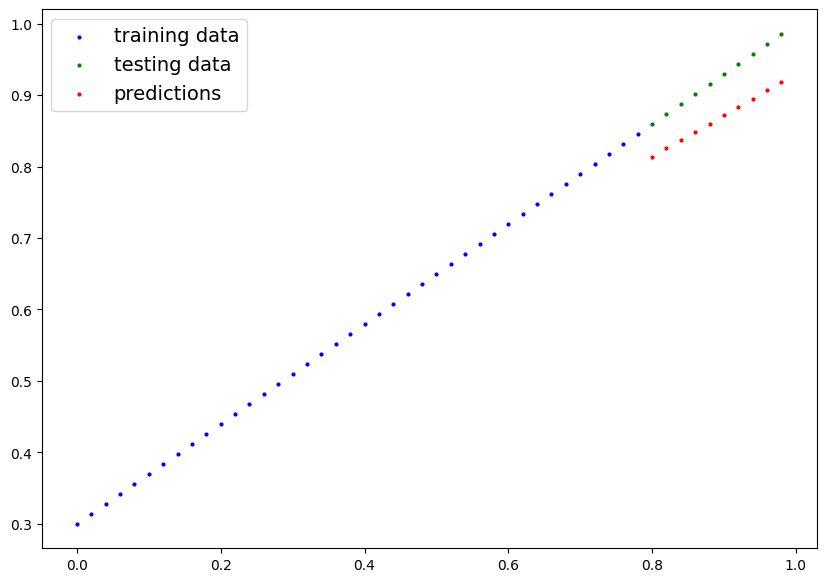

In [18]:
plots(predictions=y_preds_new)

### Saving the model in Pytorch

- ```torch.save``` : similar to Python's pickle format

- ```torch.load``` : allows u to load a saved Pytorch object

- ```torch.nn.Module.load_state_dict()```: this allows to load a model's saved state dictionary

- **Note**: Pytorch model objects usually have the extension .pth or .pt.

#### Model saving setup

In [19]:
from pathlib import Path

#create models directory
MODELPATH = Path("models")
MODELPATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODELNAME = "01_pytorch_workflow_model_0.pth"
MODELSAVEPATH = MODELPATH / MODELNAME

MODELSAVEPATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

##### Saving it actually

In [20]:
print(f"saving model to: {MODELSAVEPATH}")
torch.save(obj=model_0.state_dict(),
           f= MODELSAVEPATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Nov  2 20:57 01_pytorch_workflow_model_0.pth


### Loading a Pytorch model

- Sicne we saved our model's ```state_dict()```rather than the entire model, lets create a new instance of teh model class and load the saved ```state_dict()``` into that.

In [22]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

#### Instantiate a new instance of the model class

In [23]:
lmodel_0 = LR()

#### Load saved state dict of the model 0

- This will update the new instance with updated parameters

In [24]:
lmodel_0.load_state_dict(torch.load(f=MODELSAVEPATH))

<All keys matched successfully>

### Making predictions from the model that we loaded

##### Setup

In [25]:
lmodel_0.eval()

with torch.inference_mode():
  lmodelpreds = lmodel_0(x_test)

lmodelpreds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

##### Compare loaded model preds with the original one, ypreds

In [26]:
y_preds_new == lmodelpreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Creating device agnostic code

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using Device: {device}")


Using Device: cuda


This concludes the notebook for the Pytorch workflow.

##### Data

In [28]:
#create known parameters

w = 0.7
b = 0.3

#create
start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim = 1) #adds extra dimensions
y = w * x + b

x[:5], y[:5], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

##### Split data

In [29]:
#create train test split

trainsplit = int(0.8 * len(x))

#till the last element of x
x_train, y_train = x[:trainsplit], y[:trainsplit]

#from the last element of the given array x
x_test, y_test = x[trainsplit:], y[trainsplit:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

#### Plotting functions

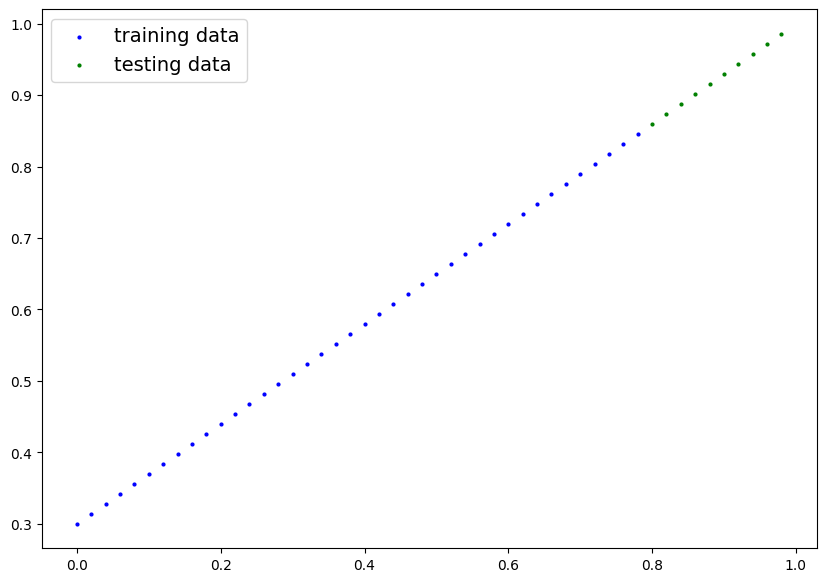

In [30]:
plots(x_train, y_train, x_test, y_test)

#### Build a Linear Model

- Here we can use nn.Linear()

- Linear layer is also called linear transform, probing layer, fully connected layer.

in and out features, is because we need to input 1 and output 1 layer. shape of in and out.

In [33]:
# Model class 2
class LR2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linearlayer = nn.Linear(in_features=1, out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linearlayer(x)

torch.manual_seed(42)
model_1 = LR2()
model_1, model_1.state_dict()

(LR2(
   (linearlayer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linearlayer.weight', tensor([[0.7645]])),
              ('linearlayer.bias', tensor([0.8300]))]))

In [34]:
x_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

#### Check the current model device

In [35]:
next(model_1.parameters()).device

device(type='cpu')

In [36]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#### Loss and Optimizer

In [38]:
#setup a loss function
lossfn = nn.L1Loss()

#set up an optimizer (stochastic gradient descent)
opt = torch.optim.SGD(params = model_1.parameters(),
                      lr = 0.01)

#### Training Loop

In [40]:
torch.manual_seed(42)

epoch = 200

# Move data to the target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

### TRAINING
# LOOP THRU THE MODEL
for e in range(epoch):
  #train() sets all parameters that requires gradients to require gradients
  model_1.train()

  #### FORWARD FUNCTION
  y_pred = model_1(x_train)

  #### LOSS FUNCTION
  loss = lossfn(y_pred, y_train)

  #### OPTIMIZER
  opt.zero_grad()

  #### PERFORM BACKPROPAGATION ON THE LOSS WRT PARAMETERS OF THE MODE
  loss.backward()

  #### STEP THE OPTIMIZER(PERFORM GRADIENT DESCENT)
  opt.step()

  # NOTE: The optimizer changes will accummulate thru the loop so..we have to zero them above after the backward function

  #testing
  model_1.eval() #turns off features that arent required for testing

  print(model_1.state_dict())

OrderedDict({'linearlayer.weight': tensor([[0.7606]], device='cuda:0'), 'linearlayer.bias': tensor([0.8200], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7567]], device='cuda:0'), 'linearlayer.bias': tensor([0.8100], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7528]], device='cuda:0'), 'linearlayer.bias': tensor([0.8000], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7489]], device='cuda:0'), 'linearlayer.bias': tensor([0.7900], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7450]], device='cuda:0'), 'linearlayer.bias': tensor([0.7800], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7411]], device='cuda:0'), 'linearlayer.bias': tensor([0.7700], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7372]], device='cuda:0'), 'linearlayer.bias': tensor([0.7600], device='cuda:0')})
OrderedDict({'linearlayer.weight': tensor([[0.7333]], device='cuda:0'), 'linearlayer.bias': tensor([0.75

#### Testing Loop

In [42]:
model_1.eval()

with torch.inference_mode():

   #turns off gradient tracking - 1. Do the forward pass
   test_pred = model_1(x_test)

   #2. Calculate the loss
   test_loss = lossfn(test_pred, y_test)

#printout whats happening (simply)
if epoch % 10 == 0:
  epoch_count.append(epoch)
  train_loss_values.append(loss)
  test_loss_values.append(test_loss)
  print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  print(model_0.state_dict())


Epoch: 200 | Loss: 0.010256479494273663 | Test Loss: 0.00033081771107390523
OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})


In [43]:
model_1.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linearlayer.bias', tensor([0.3025], device='cuda:0'))])

#### Making and evaluating predictions

In [45]:
#turn model into evaluation mode
model_1.eval()

#make predictions on the test data
with torch.inference_mode():
  ypreds1 = model_1(x_test)
  print(ypreds1)

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')


#### Plotting our predictions

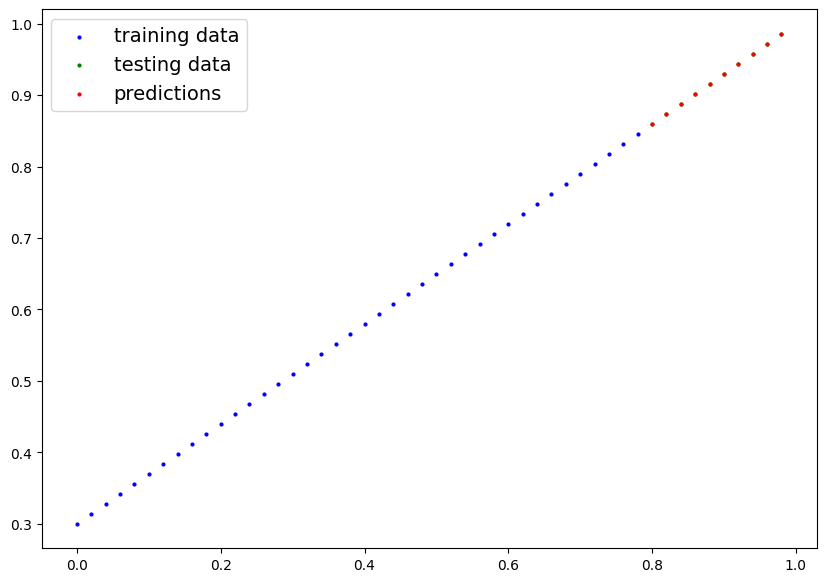

In [46]:
plots(predictions = ypreds1.cpu())

#### Save and load the trained model

##### Save

In [47]:
from pathlib import Path

#create models directory
MODELPATH = Path("models")
MODELPATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODELNAME = "01_pytorch_workflow_model_1.pth"
MODELSAVEPATH = MODELPATH / MODELNAME

MODELSAVEPATH

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [48]:
print(f"saving model to: {MODELSAVEPATH}")
torch.save(obj=model_1.state_dict(),
           f= MODELSAVEPATH)

saving model to: models/01_pytorch_workflow_model_1.pth


In [49]:
model_1.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linearlayer.bias', tensor([0.3025], device='cuda:0'))])

##### Load the model

In [50]:
lmodel_1 = LR2()

In [51]:
lmodel_1.load_state_dict(torch.load(MODELSAVEPATH))

<All keys matched successfully>

In [52]:
lmodel_1.to(device)

LR2(
  (linearlayer): Linear(in_features=1, out_features=1, bias=True)
)

#### Are they in the device?

In [53]:
next(lmodel_1.parameters()).device

device(type='cuda', index=0)

In [54]:
lmodel_1.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linearlayer.bias', tensor([0.3025], device='cuda:0'))])

#### Evaluate loaded model

In [55]:
lmodel_1.eval()

with torch.inference_mode():
  lmodel_1_preds = lmodel_1(x_test)

ypreds1 == lmodel_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

This concludes the notebook for this tutorial.